[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://githubtocolab.com/jkanclerz/dbs/blob/main/10--kafka.ipynb)

## Instalacja KAFKA 

In [11]:
!sudo apt-get -y -qq update
!sudo apt-get -y -qq install gzip

In [15]:
!rm -rf kafka*
!curl -sSOL https://dlcdn.apache.org/kafka/3.3.2/kafka_2.13-3.3.2.tgz
!tar -xzf kafka_2.13-3.3.2.tgz
!mv kafka_2.13-3.3.2 kafka

In [16]:
!./kafka/bin/zookeeper-server-start.sh -daemon ./kafka/config/zookeeper.properties

In [17]:
!./kafka/bin/kafka-server-start.sh -daemon ./kafka/config/server.properties

In [18]:
!echo "Waiting for 10 secs until kafka and zookeeper services are up and running"
!sleep 10

Waiting for 10 secs until kafka and zookeeper services are up and running


In [19]:
!ps -ef | grep kafka

root       12305       1  5 22:54 ?        00:00:02 java -Xmx512M -Xms512M -server -XX:+UseG1GC -XX:MaxGCPauseMillis=20 -XX:InitiatingHeapOccupancyPercent=35 -XX:+ExplicitGCInvokesConcurrent -XX:MaxInlineLevel=15 -Djava.awt.headless=true -Xlog:gc*:file=/content/kafka/bin/../logs/zookeeper-gc.log:time,tags:filecount=10,filesize=100M -Dcom.sun.management.jmxremote -Dcom.sun.management.jmxremote.authenticate=false -Dcom.sun.management.jmxremote.ssl=false -Dkafka.logs.dir=/content/kafka/bin/../logs -Dlog4j.configuration=file:./kafka/bin/../config/log4j.properties -cp /content/kafka/bin/../libs/activation-1.1.1.jar:/content/kafka/bin/../libs/aopalliance-repackaged-2.6.1.jar:/content/kafka/bin/../libs/argparse4j-0.7.0.jar:/content/kafka/bin/../libs/audience-annotations-0.5.0.jar:/content/kafka/bin/../libs/commons-cli-1.4.jar:/content/kafka/bin/../libs/commons-lang3-3.12.0.jar:/content/kafka/bin/../libs/commons-lang3-3.8.1.jar:/content/kafka/bin/../libs/connect-api-3.3.2.jar:/content/kafka/bi

In [20]:
!./kafka/bin/kafka-topics.sh --create --bootstrap-server 127.0.0.1:9092 --replication-factor 1 --partitions 1 --topic testit

Created topic testit.


In [21]:
!./kafka/bin/kafka-topics.sh --describe --bootstrap-server 127.0.0.1:9092 --topic testit

Topic: testit	TopicId: H4YU1dK9R-WS9y8wsVablA	PartitionCount: 1	ReplicationFactor: 1	Configs: 
	Topic: testit	Partition: 0	Leader: 0	Replicas: 0	Isr: 0


In [22]:
pip install kafka-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.5/246.5 KB 14.6 MB/s eta 0:00:00


In [36]:
import json
from kafka import KafkaProducer
from random import randint
from pprint import pprint as pp
import time

kafka_servers = ["127.0.0.1:9092"]

producer = KafkaProducer(
    bootstrap_servers=kafka_servers,
    value_serializer=lambda v: json.dumps(v).encode("utf-8"),
    retries=5,
    acks="all"
)

while True:
  F = producer.send("testit", {"value": randint(1,100)}, key="partition_key_1".encode("utf-8"))
  F.add_callback(lambda x: pp(x))
  time.sleep(2)

RecordMetadata(topic='testit', partition=0, topic_partition=TopicPartition(topic='testit', partition=0), offset=9, timestamp=1674947625909, log_start_offset=0, checksum=None, serialized_key_size=15, serialized_value_size=13, serialized_header_size=-1)
RecordMetadata(topic='testit', partition=0, topic_partition=TopicPartition(topic='testit', partition=0), offset=10, timestamp=1674947627911, log_start_offset=0, checksum=None, serialized_key_size=15, serialized_value_size=13, serialized_header_size=-1)
RecordMetadata(topic='testit', partition=0, topic_partition=TopicPartition(topic='testit', partition=0), offset=11, timestamp=1674947629914, log_start_offset=0, checksum=None, serialized_key_size=15, serialized_value_size=13, serialized_header_size=-1)
RecordMetadata(topic='testit', partition=0, topic_partition=TopicPartition(topic='testit', partition=0), offset=12, timestamp=1674947631916, log_start_offset=0, checksum=None, serialized_key_size=15, serialized_value_size=13, serialized_heade

KeyboardInterrupt: ignored

In [52]:
!python producer.py


Traceback (most recent call last):
  File "producer.py", line 19, in <module>
    time.sleep(10)
KeyboardInterrupt
^C


In [2]:
!nohup python producer.py > output.log &

nohup: redirecting stderr to stdout


In [4]:
import json
from kafka import KafkaConsumer

kafka_servers = ["127.0.0.1:9092"]

consumer = KafkaConsumer(
    bootstrap_servers=kafka_servers,
    value_deserializer=lambda v: json.loads(v),
    auto_offset_reset='earliest',
    group_id='worker-group-2'
)

consumer.subscribe(["testit"])

from pprint import pprint as pp
for msg in consumer:
    pp(msg)


ConsumerRecord(topic='testit', partition=0, offset=981, timestamp=1674948234934, timestamp_type=0, key=b'partition_key_1', value={'value': 61}, headers=[], checksum=None, serialized_key_size=15, serialized_value_size=13, serialized_header_size=-1)
ConsumerRecord(topic='testit', partition=0, offset=982, timestamp=1674948235730, timestamp_type=0, key=b'partition_key_1', value={'value': 57}, headers=[], checksum=None, serialized_key_size=15, serialized_value_size=13, serialized_header_size=-1)
ConsumerRecord(topic='testit', partition=0, offset=983, timestamp=1674948236059, timestamp_type=0, key=b'partition_key_1', value={'value': 44}, headers=[], checksum=None, serialized_key_size=15, serialized_value_size=13, serialized_header_size=-1)
ConsumerRecord(topic='testit', partition=0, offset=984, timestamp=1674948236528, timestamp_type=0, key=b'partition_key_1', value={'value': 74}, headers=[], checksum=None, serialized_key_size=15, serialized_value_size=13, serialized_header_size=-1)
Consumer

KeyboardInterrupt: ignored

In [3]:
!ps -ef

UID          PID    PPID  C STIME TTY          TIME CMD
root           1       0  0 22:35 ?        00:00:00 /sbin/docker-init -- /datala
root           7       1  0 22:35 ?        00:00:10 /tools/node/bin/node /datala
root          18       0  0 22:35 ?        00:00:00 tail -n +0 -F /root/.config/
root          31       7  0 22:35 ?        00:00:03 /bin/bash -e /usr/local/cola
root          33       1  0 22:35 ?        00:00:00 /bin/bash -e /datalab/run.sh
root          35      33  0 22:35 ?        00:00:02 /usr/colab/bin/kernel_manage
root          63       7  0 22:35 ?        00:00:06 [python3] <defunct>
root          64       7  0 22:35 ?        00:00:00 python3 /usr/local/bin/colab
root          86       7  0 22:35 ?        00:00:07 /usr/bin/python3 /usr/local/
root          87       7  0 22:35 ?        00:00:04 /usr/local/bin/dap_multiplex
root       12305       1  0 22:54 ?        00:00:05 java -Xmx512M -Xms512M -serv
root       12765       1  1 22:54 ?        00:00:33 java -Xmx1

In [ ]:
!killall python3

In [5]:
!apt-get install openjdk-11-jdk-headless -qq > /dev/null
!wget https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz -O spark-3.3.1-bin-hadoop3.tgz
!tar xf spark-3.3.1-bin-hadoop3.tgz

--2023-01-28 23:26:55--  https://dlcdn.apache.org/spark/spark-3.3.1/spark-3.3.1-bin-hadoop3.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299350810 (285M) [application/x-gzip]
Saving to: ‘spark-3.3.1-bin-hadoop3.tgz’

spark-3.3.1-bin-had 100%[===================>] 285.48M   233MB/s    in 1.2s    

2023-01-28 23:26:56 (233 MB/s) - ‘spark-3.3.1-bin-hadoop3.tgz’ saved [299350810/299350810]



In [6]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-11-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.1-bin-hadoop3"

In [8]:
pip install pyspark

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 5.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 10.8 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.1-py2.py3-none-any.whl size=281845512 sha256=27fc5730aaad66c43d1d01bc3707594fa34b370727fa23e91a60cf8495f20059
  Stored in directory: /root/.cache/pip/wheels/43/dc/11/ec201cd671da62fa9c5cc77078235e40722170ceba231d7598
Successfully built pyspark


In [9]:
from pyspark.sql import SparkSession

spark = (SparkSession.builder
        .master("local")
        .appName("Spark playground")
        .getOrCreate())

In [10]:
spark

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [32]:
from pyspark.sql.types import *
schema = StructType([
    StructField('Datetime', TimestampType()),
    StructField('Open', DecimalType(), True),
    StructField('High', DecimalType(), True),
    StructField('Low', DecimalType(), True),
    StructField('Close', DecimalType(), True),
    StructField('Volume', IntegerType(), True),
    StructField('Dividends', DoubleType(), True),
    StructField('Stock Splits', DoubleType(), True)
])
df = (spark.read
      .option("header", True)
      .option("recursiveFileLookup", True)
      .option("delimiter", ',')
      .schema(schema)
      .csv('/content/drive/MyDrive/fo'))

In [34]:
df.printSchema()

root
 |-- Datetime: timestamp (nullable = true)
 |-- Open: decimal(10,0) (nullable = true)
 |-- High: decimal(10,0) (nullable = true)
 |-- Low: decimal(10,0) (nullable = true)
 |-- Close: decimal(10,0) (nullable = true)
 |-- Volume: integer (nullable = true)
 |-- Dividends: double (nullable = true)
 |-- Stock Splits: double (nullable = true)



In [35]:
df.show(2)

+-------------------+----+----+---+-----+------+---------+------------+
|           Datetime|Open|High|Low|Close|Volume|Dividends|Stock Splits|
+-------------------+----+----+---+-----+------+---------+------------+
|2023-01-11 08:00:00|  62|  63| 62|   62|     0|      0.0|         0.0|
|2023-01-11 08:01:00|  63|  63| 62|   62|  4296|      0.0|         0.0|
+-------------------+----+----+---+-----+------+---------+------------+
only showing top 2 rows



In [36]:
df.createOrReplaceTempView('stocks')

In [57]:
stocks = spark.sql('''
  select 
    regexp_replace(input_file_name(), '.*([A-Z]{3}\.WA).*', '$1') as ticker,
    from_utc_timestamp(DateTime, 'Europe/Warsaw') datetime,
    to_date(DateTime) as date,
    Open open,
    High high,
    Close close,
    Volume volume
    from stocks limit 
''')

In [59]:
(stocks.write
  .option('overwrite', True)
  .partitionBy(['ticker', 'date']).parquet("/content/drive/MyDrive/fo/stocks"))

In [60]:
loadedDf = spark.read.parquet("/content/drive/MyDrive/fo/stocks")

In [61]:
loadedDf.show(10)


+-------------------+----+----+-----+------+------+----------+
|           datetime|open|high|close|volume|ticker|      date|
+-------------------+----+----+-----+------+------+----------+
|2023-01-05 08:00:00|  65|  65|   65|     0|PKN.WA|2023-01-05|
|2023-01-05 08:01:00|  65|  65|   65|  5155|PKN.WA|2023-01-05|
|2023-01-05 08:02:00|  65|  65|   65|  6039|PKN.WA|2023-01-05|
|2023-01-05 08:03:00|  65|  65|   65|  2006|PKN.WA|2023-01-05|
|2023-01-05 08:04:00|  65|  65|   65|  3868|PKN.WA|2023-01-05|
|2023-01-05 08:05:00|  65|  65|   65|  3643|PKN.WA|2023-01-05|
|2023-01-05 08:06:00|  65|  66|   65| 11558|PKN.WA|2023-01-05|
|2023-01-05 08:07:00|  65|  65|   65|  9340|PKN.WA|2023-01-05|
|2023-01-05 08:08:00|  65|  65|   65|  4344|PKN.WA|2023-01-05|
|2023-01-05 08:09:00|  65|  65|   65|  5372|PKN.WA|2023-01-05|
+-------------------+----+----+-----+------+------+----------+
only showing top 10 rows



In [62]:
loadedDf.printSchema()

root
 |-- datetime: timestamp (nullable = true)
 |-- open: decimal(10,0) (nullable = true)
 |-- high: decimal(10,0) (nullable = true)
 |-- close: decimal(10,0) (nullable = true)
 |-- volume: integer (nullable = true)
 |-- ticker: string (nullable = true)
 |-- date: date (nullable = true)



In [63]:
pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
loadedDf.createOrReplaceTempView('stocks')

In [100]:
spark.sql('''
  with ranked as (
  select
    ticker,
    datetime,
    date, 
    close, 
    rank() over (partition by date order by datetime DESC) as rank
  from stocks
  where ticker = "PKN.WA"
  order by datetime DESC)
  
  select * from ranked where rank = 1
  ''').show()

+------+-------------------+----------+-----+----+
|ticker|           datetime|      date|close|rank|
+------+-------------------+----------+-----+----+
|PKN.WA|2023-01-26 16:05:00|2023-01-26|   68|   1|
|PKN.WA|2023-01-25 16:04:00|2023-01-25|   64|   1|
|PKN.WA|2023-01-24 16:03:00|2023-01-24|   65|   1|
|PKN.WA|2023-01-23 16:04:00|2023-01-23|   65|   1|
|PKN.WA|2023-01-20 16:04:00|2023-01-20|   64|   1|
|PKN.WA|2023-01-19 16:04:00|2023-01-19|   63|   1|
|PKN.WA|2023-01-18 16:04:00|2023-01-18|   64|   1|
|PKN.WA|2023-01-17 16:04:00|2023-01-17|   62|   1|
|PKN.WA|2023-01-16 16:04:00|2023-01-16|   63|   1|
|PKN.WA|2023-01-13 16:00:00|2023-01-13|   63|   1|
|PKN.WA|2023-01-12 16:04:00|2023-01-12|   63|   1|
|PKN.WA|2023-01-11 16:03:00|2023-01-11|   62|   1|
|PKN.WA|2023-01-10 16:04:00|2023-01-10|   62|   1|
|PKN.WA|2023-01-09 16:04:00|2023-01-09|   62|   1|
|PKN.WA|2023-01-05 16:04:00|2023-01-05|   62|   1|
|PKN.WA|2023-01-04 16:03:00|2023-01-04|   66|   1|
|PKN.WA|2023-01-03 16:03:00|202

In [144]:
asPd = spark.sql('''
  with ranked as (
  select
    ticker,
    datetime,
    date, 
    close, 
    rank() over (partition by date order by datetime DESC) as rank
  from stocks
  where ticker = "PKN.WA"
  order by datetime DESC)
  
  select date, cast (close as float) from ranked where rank = 1
  ''').toPandas()

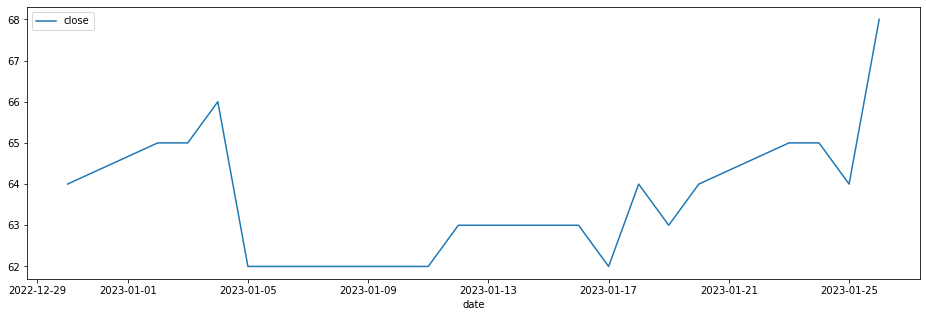

In [145]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [16, 5]
asPd.set_index('date').plot.line()

In [198]:
toModelAll = spark.sql('''
  select
    ticker,
    from_utc_timestamp(datetime, 'Europe/Warsaw') datetime,
    date, 
    close,
    lag(close, 1) over (order by datetime) lag_close_1,
    lag(close, 2) over (order by datetime) lag_close_2,
    lag(close, 3) over (order by datetime) lag_close_3,
    lag(close, 4) over (order by datetime) lag_close_4,
    lag(close, 5) over (order by datetime) lag_close_5,
    volume,
    lag(volume, 1) over (order by datetime) lag_volume_1,
    lag(volume, 2) over (order by datetime) lag_volume_2,
    lag(volume, 3) over (order by datetime) lag_volume_3,
    lag(volume, 4) over (order by datetime) lag_volume_4,
    lag(volume, 5) over (order by datetime) lag_volume_5
  from stocks
  where ticker = "PKN.WA" and date_format(from_utc_timestamp(datetime, 'Europe/Warsaw'), 'HH:mm:ss') >= "09:00:00" and date_format(from_utc_timestamp(datetime, 'Europe/Warsaw'), 'HH:mm:ss') < "17:00:00"
  order by datetime DESC
''').drop()


In [199]:
toModelAll.show()

+------+-------------------+----------+-----+-----------+-----------+-----------+-----------+-----------+------+------------+------------+------------+------------+------------+
|ticker|           datetime|      date|close|lag_close_1|lag_close_2|lag_close_3|lag_close_4|lag_close_5|volume|lag_volume_1|lag_volume_2|lag_volume_3|lag_volume_4|lag_volume_5|
+------+-------------------+----------+-----+-----------+-----------+-----------+-----------+-----------+------+------------+------------+------------+------------+------------+
|PKN.WA|2023-01-26 16:49:00|2023-01-26|   65|         65|         65|         65|         65|         65|  5857|        5986|         972|        5967|        9171|        2821|
|PKN.WA|2023-01-26 16:48:00|2023-01-26|   65|         65|         65|         65|         65|         65|  5986|         972|        5967|        9171|        2821|        3205|
|PKN.WA|2023-01-26 16:47:00|2023-01-26|   65|         65|         65|         65|         65|         65|   97

# Features

In [200]:
from pyspark.ml.feature import VectorAssembler

In [201]:
va = VectorAssembler(inputCols = ['lag_close_1', 'lag_close_2','lag_close_3','lag_close_4','lag_close_5','lag_volume_1','lag_volume_2','lag_volume_3','lag_volume_4','lag_volume_5'], outputCol = 'features')

In [202]:
toModelAll.printSchema()

root
 |-- ticker: string (nullable = true)
 |-- datetime: timestamp (nullable = true)
 |-- date: date (nullable = true)
 |-- close: decimal(10,0) (nullable = true)
 |-- lag_close_1: decimal(10,0) (nullable = true)
 |-- lag_close_2: decimal(10,0) (nullable = true)
 |-- lag_close_3: decimal(10,0) (nullable = true)
 |-- lag_close_4: decimal(10,0) (nullable = true)
 |-- lag_close_5: decimal(10,0) (nullable = true)
 |-- volume: integer (nullable = true)
 |-- lag_volume_1: integer (nullable = true)
 |-- lag_volume_2: integer (nullable = true)
 |-- lag_volume_3: integer (nullable = true)
 |-- lag_volume_4: integer (nullable = true)
 |-- lag_volume_5: integer (nullable = true)



In [224]:
toModelAll = toModelAll.dropna()

In [225]:
reg_df = va.transform(toModelAll)

In [226]:
reg_df.select('features', 'close').show(3)

+--------------------+-----+
|            features|close|
+--------------------+-----+
|[65.0,65.0,65.0,6...|   65|
|[65.0,65.0,65.0,6...|   65|
|[65.0,65.0,65.0,6...|   65|
+--------------------+-----+
only showing top 3 rows



https://spark.apache.org/docs/latest/ml-classification-regression.html https://spark.apache.org/docs/latest/api/python/pyspark.ml.html#pyspark.ml.regression.LinearRegression



In [227]:
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

In [228]:
reg_df.select('features', 'close').printSchema()

root
 |-- features: vector (nullable = true)
 |-- close: decimal(10,0) (nullable = true)



In [229]:
(train_df, test_df) = reg_df.randomSplit([0.7, 0.3])


In [230]:
train_df.show()

+------+-------------------+----------+-----+-----------+-----------+-----------+-----------+-----------+------+------------+------------+------------+------------+------------+--------------------+
|ticker|           datetime|      date|close|lag_close_1|lag_close_2|lag_close_3|lag_close_4|lag_close_5|volume|lag_volume_1|lag_volume_2|lag_volume_3|lag_volume_4|lag_volume_5|            features|
+------+-------------------+----------+-----+-----------+-----------+-----------+-----------+-----------+------+------------+------------+------------+------------+------------+--------------------+
|PKN.WA|2022-12-30 09:07:00|2022-12-30|   64|         64|         64|         64|         64|         64|    10|         440|          70|        3615|         557|         815|[64.0,64.0,64.0,6...|
|PKN.WA|2022-12-30 09:08:00|2022-12-30|   64|         64|         64|         64|         64|         64|   993|          10|         440|          70|        3615|         557|[64.0,64.0,64.0,6...|
|PKN.

In [231]:
 
lr = LinearRegression(featuresCol='features',labelCol='close')
 
lr_model = lr.fit(train_df)

In [232]:
print("Coefficients: " + str(lr_model.coefficients))
print("Intercept: " + str(lr_model.intercept))

Coefficients: [0.6196506226189417,0.17221293294938028,0.024134210239417506,0.08417088587563083,0.09525810025817205,-5.4149279080012714e-08,-1.6613674997448953e-07,1.0256935237231099e-07,-9.284493688993309e-08,-1.2821924431870398e-07]
Intercept: 0.29308715084486425



$$ \hat{Y} = X_{1}{\beta}_{1} + ... + X_{n}{\beta}_{n} + {\beta}_0 $$
$$ \hat{Y} = 0.6196 * X_{1} + ... + X_{n}{\beta}_{n} + 0.293 $$

In [233]:
trainingSummary = lr_model.summary

In [234]:
print("R2: %f" % trainingSummary.r2)

R2: 0.979800


In [235]:
lr_predictions = lr_model.transform(test_df)

In [237]:
lr_predictions.select("prediction","close","features").show(100)

+------------------+-----+--------------------+
|        prediction|close|            features|
+------------------+-----+--------------------+
| 64.00007611117267|   64|[64.0,64.0,64.0,6...|
| 63.99961275505283|   64|[64.0,64.0,64.0,6...|
| 63.99942100795039|   64|[64.0,64.0,64.0,6...|
| 63.99964089048177|   64|[64.0,64.0,64.0,6...|
|  64.0001044539158|   64|[64.0,64.0,64.0,6...|
| 64.00023109354248|   64|[64.0,64.0,64.0,6...|
| 64.00017438593005|   64|[64.0,64.0,64.0,6...|
| 64.00004548525573|   64|[64.0,64.0,64.0,6...|
| 64.00030755285114|   64|[64.0,64.0,64.0,6...|
|  64.0001284815195|   64|[64.0,64.0,64.0,6...|
| 64.00024761941371|   64|[64.0,64.0,64.0,6...|
| 64.00030946356179|   64|[64.0,64.0,64.0,6...|
| 64.00022675748559|   64|[64.0,64.0,64.0,6...|
| 64.00029928538548|   64|[64.0,64.0,64.0,6...|
| 64.00024067198605|   64|[64.0,64.0,64.0,6...|
| 64.00027640566088|   64|[64.0,64.0,64.0,6...|
| 64.00001366562259|   64|[64.0,64.0,64.0,6...|
|   64.000071772848|   64|[64.0,64.0,64.

In [238]:
from pyspark.ml.evaluation import RegressionEvaluator

In [240]:
# R2:
lr_evaluator = RegressionEvaluator(predictionCol="prediction",
                                   labelCol="close",
                                   metricName="r2")
 
print("R2 on test data = %g" % lr_evaluator.evaluate(lr_predictions))

R2 on test data = 0.97967


In [252]:
lr_model.write().overwrite().save("/content/drive/MyDrive/fo/models/predict/PKN.WA")